Decision trees and Decision forests 1

<b>A decision tree is a flowchart-like structure in which each internal node represents a “test” on an attribute </b>

<b>Root Node:</b> It represents entire population or sample and this further gets divided into two or more homogeneous sets.

<b>Splitting:</b> It is a process of dividing a node into two or more sub-nodes.

<b>Decision Node:</b> When a sub-node splits into further sub-nodes, then it is called decision node.

<b>Leaf/ Terminal Node:</b>Nodes do not split is called Leaf or Terminal node.
<b>Pruning:</b> When we remove sub-nodes of a decision node, this process is called pruning. You can say opposite process of splitting.
<b>Branch / Sub-Tree:</b> A sub section of entire tree is called branch or sub-tree.
<b>Parent and Child Node:</b> A node, which is divided into sub-nodes is called parent node of sub-nodes whereas sub-nodes are the child of parent node.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [26]:
df = pd.read_csv('/media/alerti/studies/Ml & Dl/ml/Decision-trees-and-random-forests-master/kyphosis.csv')

In [6]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


exploring dataset


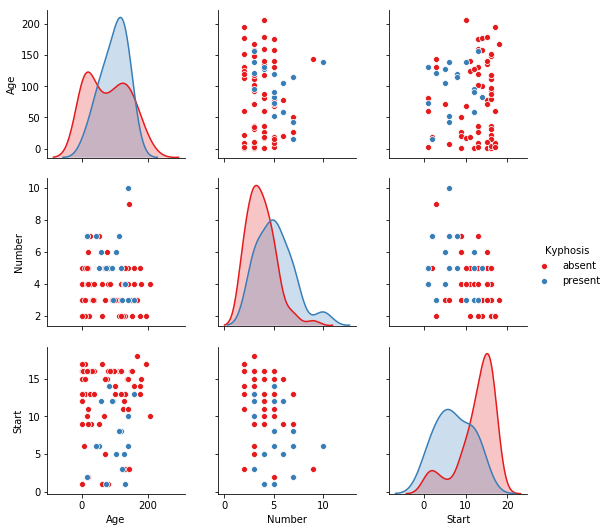

In [7]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

## Train Test Split

Let's split up the data into a training set and a test set!

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

#Decsion treess


In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
dtree = DecisionTreeClassifier()

In [13]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [14]:
predictions = dtree.predict(X_test)

In [15]:
from sklearn.metrics import classification_report,confusion_matrix

In [16]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.94      0.74      0.83        23
     present       0.14      0.50      0.22         2

   micro avg       0.72      0.72      0.72        25
   macro avg       0.54      0.62      0.53        25
weighted avg       0.88      0.72      0.78        25



In [17]:
print(confusion_matrix(y_test,predictions))

[[17  6]
 [ 1  1]]


Simple visualization

In [20]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

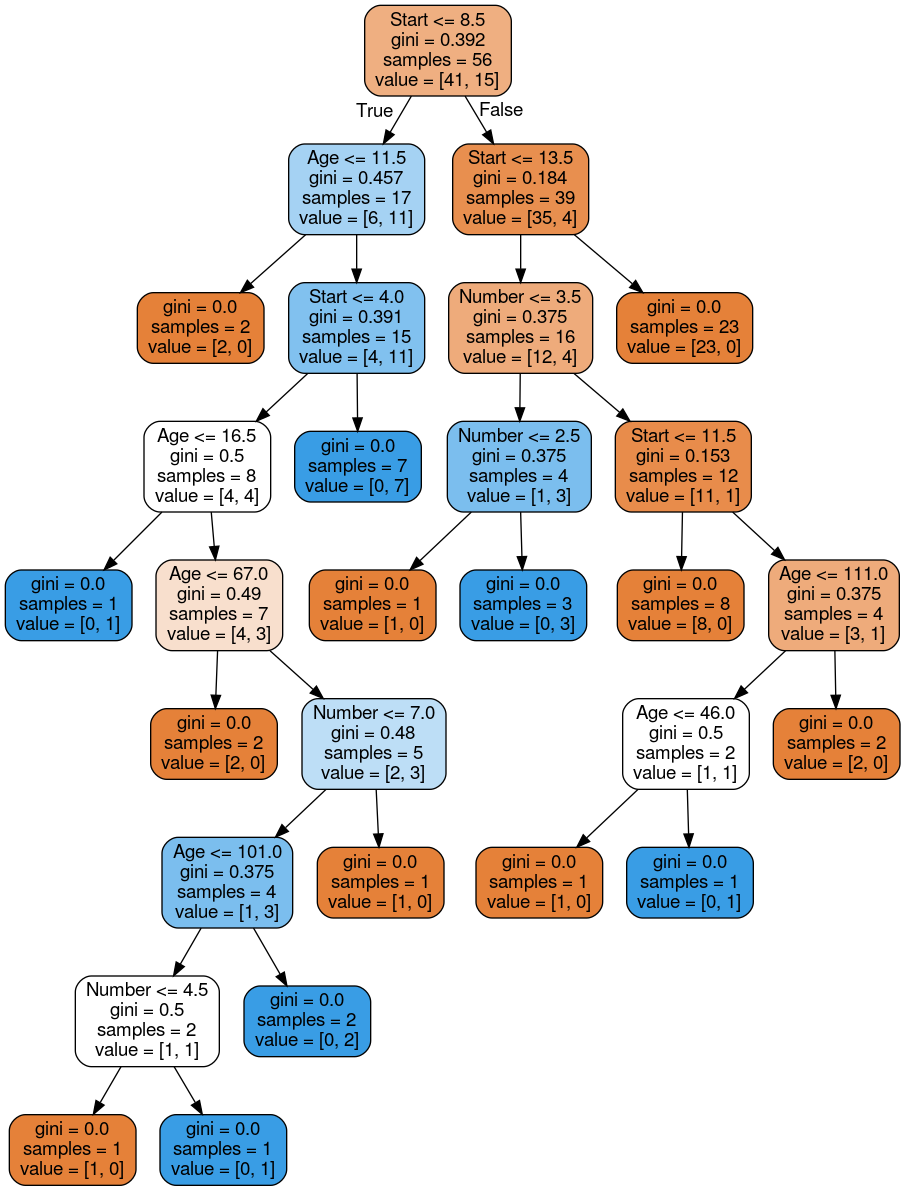

In [21]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

#random forest


In [22]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [23]:
rfc_pred = rfc.predict(X_test)

In [24]:
print(confusion_matrix(y_test,rfc_pred))

[[21  2]
 [ 2  0]]


In [25]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.91      0.91      0.91        23
     present       0.00      0.00      0.00         2

   micro avg       0.84      0.84      0.84        25
   macro avg       0.46      0.46      0.46        25
weighted avg       0.84      0.84      0.84        25

